In [1]:
import numpy as np
import matplotlib.pyplot as plt

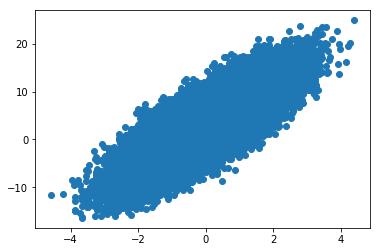

In [5]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)
plt.scatter(X, y)

In [7]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. /len(y)

def gradient_decent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        cur_iter += 1
    return theta

In [23]:
%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_decent(X_b, y, initial_theta, eta)

CPU times: user 9 µs, sys: 11 µs, total: 20 µs
Wall time: 49.1 µs


In [24]:
theta

array([ 3.01794874,  4.00685162])

## 随机梯度下降法

In [25]:
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2.

In [26]:
def sgd(X_b, y, initial_theta, n_iters):
    #经验估算
    t0 = 5
    t1 = 50
    
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient

    return theta

In [27]:
%%time
X_b = np.stack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b)//3)

CPU times: user 1.53 ms, sys: 2.06 ms, total: 3.59 ms
Wall time: 2.06 ms


In [28]:
theta

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])